<a href="https://colab.research.google.com/github/Megha2004/HealthCareAnalytics/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv("/content/Breast cancer.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,M
1,20.57,17.77,132.90,1326.0,0.08474,M
2,19.69,21.25,130.00,1203.0,0.10960,M
3,11.42,20.38,77.58,386.1,0.14250,M
4,20.29,14.34,135.10,1297.0,0.10030,M


In [35]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [36]:
df.info

<bound method DataFrame.info of      mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

    diagnosis  
0           M  

In [37]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

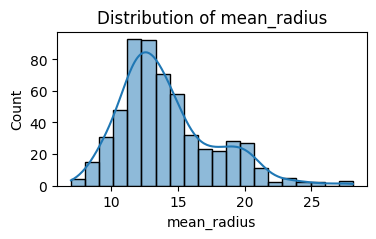

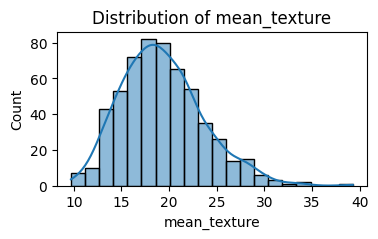

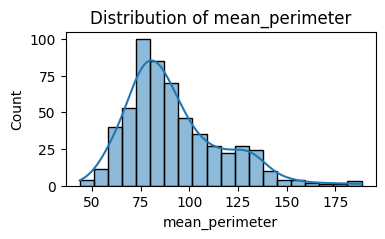

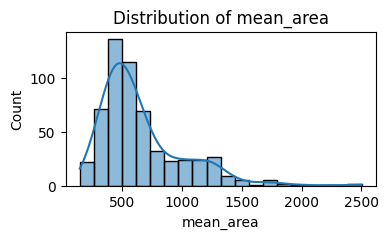

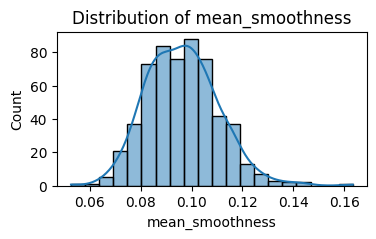

In [38]:
selected_columns = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']

for column in selected_columns:
    plt.figure(figsize=(4,2))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

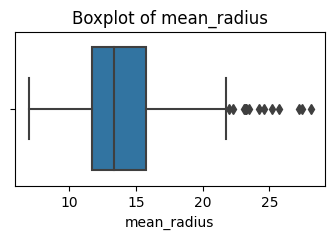

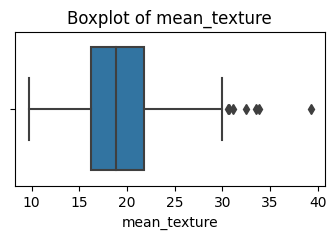

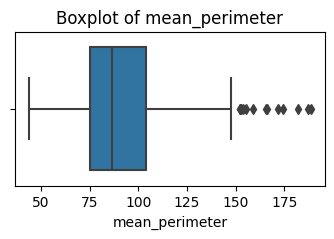

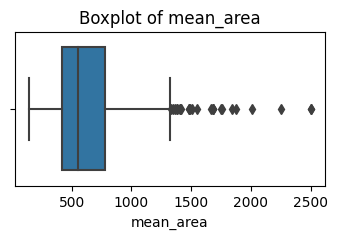

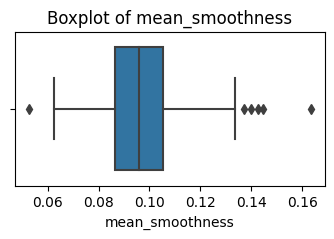

In [39]:
column_to_exclude = 'diagnosis'

for column in df.columns:
    if column != column_to_exclude:
        plt.figure(figsize=(4,2))
        sns.boxplot(data=df, x=column)
        plt.title(f'Boxplot of {column}')
        plt.show()

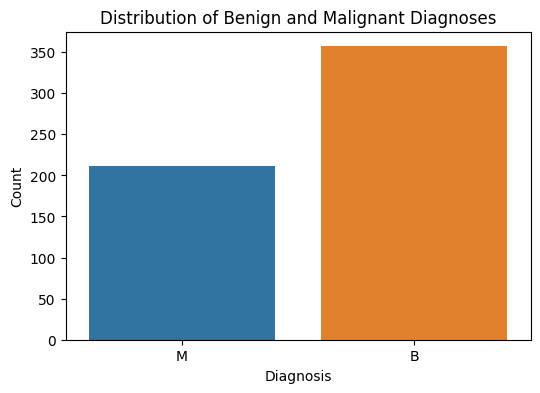

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diagnosis')
plt.title('Distribution of Benign and Malignant Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [55]:
!pip install xgboost

In [63]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset or create a DataFrame with your data
# Replace 'your_dataset.csv' with your actual dataset file or create a DataFrame as needed
df = pd.read_csv('/content/Breast cancer.csv')

# Extract features (X) and the target variable (y)
X = df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']]
y = df['diagnosis']

# Encode the target variable 'diagnosis' ('B' -> 0, 'M' -> 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

# Now, you can prompt the user to input values for prediction
print("Please enter values for the features you want to predict:")
user_input = {}

user_input['mean_radius'] = float(input("Enter value for mean_radius: "))
user_input['mean_texture'] = float(input("Enter value for mean_texture: "))
user_input['mean_perimeter'] = float(input("Enter value for mean_perimeter: "))
user_input['mean_area'] = float(input("Enter value for mean_area: "))
user_input['mean_smoothness'] = float(input("Enter value for mean_smoothness: "))

# Create a DataFrame with user input data
new_data = pd.DataFrame(user_input, index=[0])

# Make predictions using the XGBoost model
predicted_diagnosis = xgb_model.predict(new_data)

# Convert the prediction back to 'B' (benign) or 'M' (malignant)
predicted_diagnosis = label_encoder.inverse_transform(predicted_diagnosis)

# Print the predicted diagnosis
print(f'Predicted Diagnosis: {predicted_diagnosis[0]}')


Accuracy on the test set: 93.86%
Please enter values for the features you want to predict:
Enter value for mean_radius: 12.5
Enter value for mean_texture: 20
Enter value for mean_perimeter: 90.5
Enter value for mean_area: 1200
Enter value for mean_smoothness: 0.112
Predicted Diagnosis: M
